# Exploratory Data Analysis

## Automobile Dataset

### Problem Statement :

This dataset consist of data From 1985 Ward's Automotive Yearbook. It consists of three types of entities:
- The specification of an auto in terms of various characteristics
- Its assigned insurance risk rating 
- Its normalized losses in use as compared to other cars.



### About the DataSet :

Below are the features in the dataset and their description

|Features|Description|
|-----|-----|
|symboling|It is a risk factor symbol associated to the price & corresponds to the degree to which an automobile is more risky than its price indicates. +3 indicates risky, -3 indicates safety|
|make|Indicates the maker or manufacturer of the automobile|
|fuel-type|Indicates the type of fuel - diesel or gas|
|body-style|Indicates whether the body shape of automobile is a hardtop, wagon, sedan, hatchback or convertible|
|drive-wheels|Indicates the configuration of drive wheels for the automobile|
|wheel-base|It is the distance between the centers of the front wheel and the rear wheel. It is continuous ranging from 86.6 120.9|
|length|Indicates length of the automobile and ranges from 141.1 to 208.1.|
|width|Indicates width of the automobile and ranges from 60.3 to 72.3|
|height|Indicates the width of the automobile and ranges 47.8 to 59.8|
|horsepower|Maximum horsepower the automobile engine can output and ranges from 48 to 288|
|peak-rpm|RPM is a way to measure how many times per minute components in the engine rotate. It ranges from 4150 to 6600|
|highway-mpg|Indicates the miles per galon typically consumed at highways. It is continuous from 4150 to 6600|
|city-mpg|Indicates the miles per galon typically consumed at cities. It is continuous from 13 to 49|
|price|Indicates the price of the automobile and ranges from 5118 to 45400|
|normalized-losses|It is a continuous variable ranging from 65 to 256|
|engine-location|Indicates the location of the engine - front or rear|
|engine-type|Indicates the type of engine.|
|engine-size|It is continuous from 61 to 326|

### Load and understand your data
- The data consists of 205 instances and 14 features

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import Imputer,LabelEncoder
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv('../data/Automobile_data1.csv')
df.head()

,symboling,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,height,horsepower,peak-rpm,highway-mpg,city-mpg,price
0,3,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,111,5000,27,21,13495
1,3,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,111,5000,27,21,16500
2,1,alfa-romero,gas,hatchback,rwd,94.5,171.2,65.5,52.4,154,5000,26,19,16500
3,2,audi,gas,sedan,fwd,99.8,176.6,66.2,54.3,102,5500,30,24,13950
4,2,audi,gas,sedan,4wd,99.4,176.6,66.4,54.3,115,5500,22,18,17450


### Check the number of null values in each column get a general description of your data

In [3]:
df.isnull().sum()
df.describe(include='all')

,symboling,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,height,horsepower,peak-rpm,highway-mpg,city-mpg,price
count,205.000000,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,22,2,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,toyota,gas,sedan,fwd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,32,185,96,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,104.936585,5127.804878,30.751220,25.219512,13476.258537
std,1.245307,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,40.609702,478.414007,6.886443,6.542142,8114.166248
min,-2.000000,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,48.000000,4150.000000,16.000000,13.000000,5118.000000
25%,0.000000,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,70.000000,4800.000000,25.000000,19.000000,7788.000000
50%,1.000000,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,95.000000,5200.000000,30.000000,24.000000,10595.000000
75%,2.000000,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,116.000000,5500.000000,34.000000,30.000000,16558.000000


### Plot a histogram showing the distribution of the car prices (target variable) and if any skewness, print the value of skewness

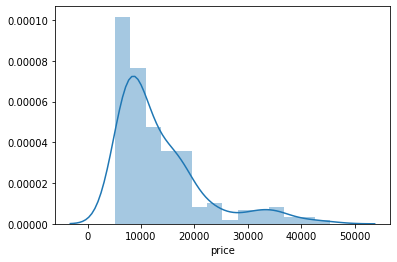

In [4]:
sns.distplot(df['price'])

The distribution is right skewed

In [5]:
print("Skewness: %f" % df['price'].skew())

Skewness: 1.684325


### Plot a countplot of the 'make' column of the dataset which represents the different car makers.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

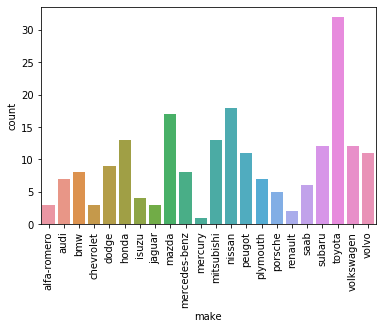

In [6]:
sns.countplot(x="make", data=df)
plt.xticks(rotation=90)

Toyota is the highest car makers followed by nisan and mazda

### Plot a jointplot that shows the relationship between the 'horsepower' and 'price' of the car.

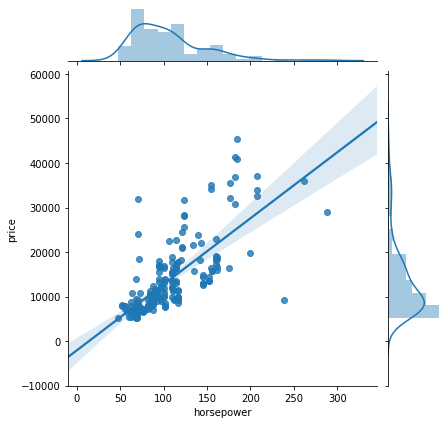

In [7]:
sns.jointplot(df['horsepower'],df['price'],kind='reg')

# checking a jointplot with make

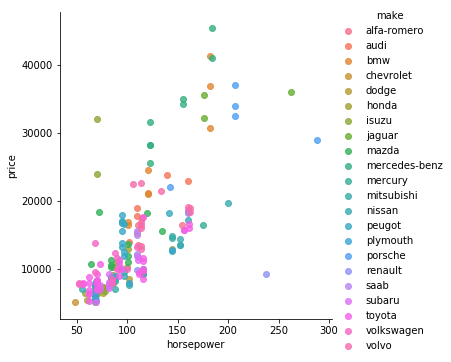

In [8]:
sns.lmplot('horsepower','price',hue='make',data=df,fit_reg=False)

observation:- As horsepower increases price also increases

### Plot the insurance risk ratings for all the automobiles

Text(0.5, 0, 'Risk rating')

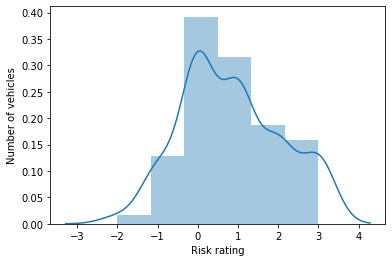

In [9]:
sns.distplot(df['symboling'],bins=6)
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating')

This graph shows that almost every vehicle is at 0 Risk i.e Risk free. so buyers can trust the makers on risk factor while purchasing cars

Text(0.5, 0, 'Risk rating')

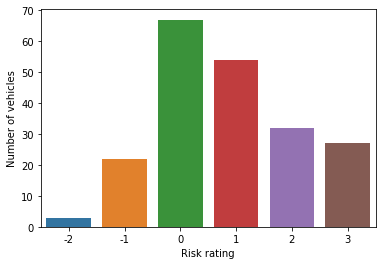

In [10]:
sns.countplot('symboling',data=df)
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating')

### Plot a pie chart of the fuel-type of the automobiles

Text(0.5, 1.0, 'Fuel-Type Diagram')

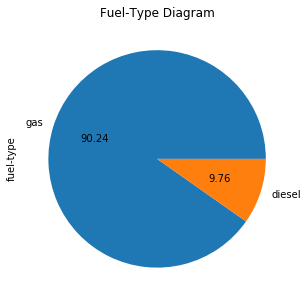

In [11]:
df['fuel-type'].value_counts().plot.pie(figsize=(5,5),autopct='%.2f')
plt.title('Fuel-Type Diagram')

### Plot the pearson correlation of all the features in a heatmap.

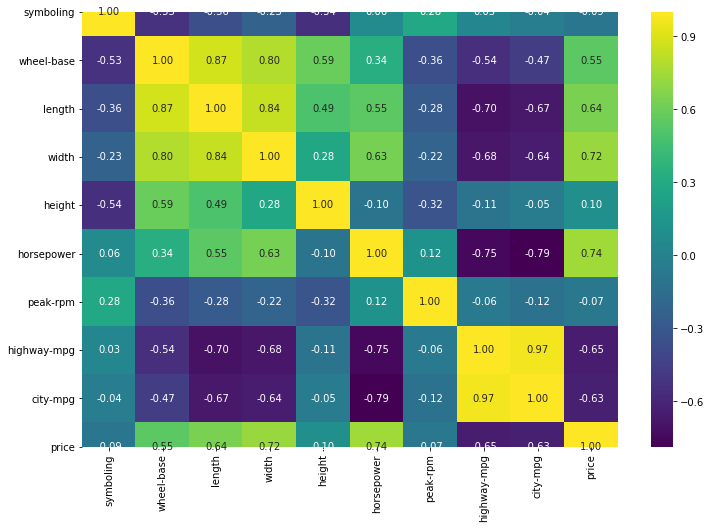

In [12]:
plt.figure(figsize=(12,8))
corr=df.corr()
sns.heatmap(corr,cmap='viridis',annot=True,fmt='.2f')

### Plot a boxplot that shows the variability of each 'body-style' with respect to the 'price'.

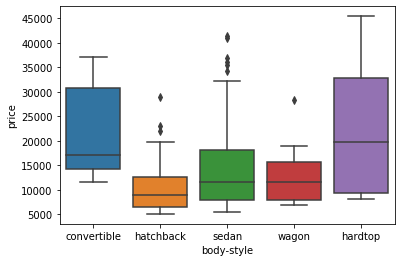

In [13]:
sns.boxplot('body-style','price',data=df)

There is a variation for each body-style w.r.t car price

### Plot a boxplot showing the variablity in the 'price' for each 'make' of the car 

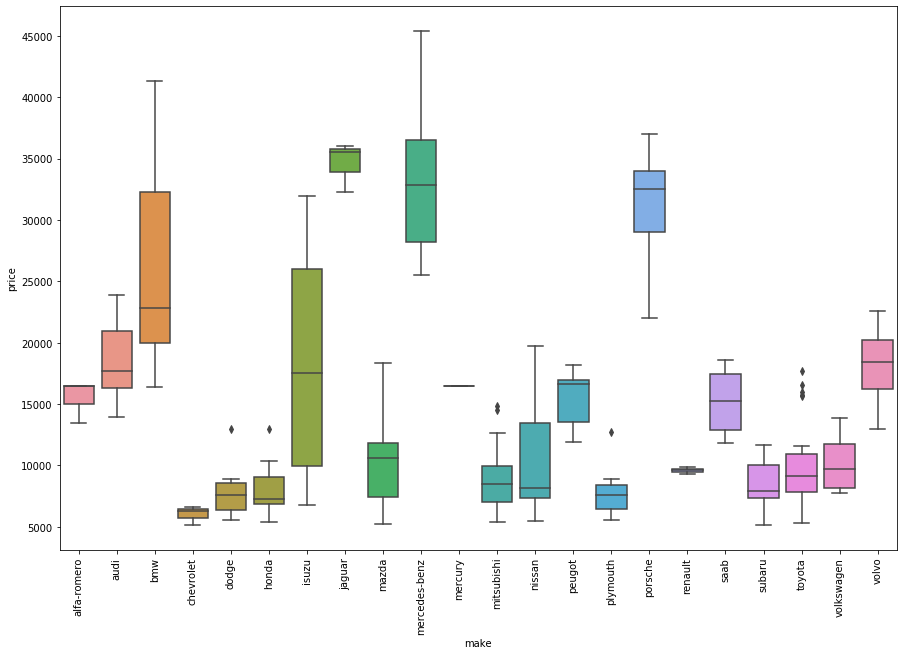

In [14]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.boxplot('make','price',data=df)

Price is varying depending on makers of the cars

## Data Preprocessing for the Automobile dataset

In [15]:
automobile = pd.read_csv('../data/Automobile_data.csv')
automobile.head()
#y = automobile[["price"]]
#automobile.drop("price",1,inplace=True)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


### Find out number of records having '?' value for normalized losses

In [16]:
automobile['normalized-losses'].loc[automobile['normalized-losses'] == '?'].count()
automobile['horsepower'].loc[automobile['horsepower'] == '?'].count()

2

### Impute the missing values of the numerical data with mean of the column (`normalized-losses and horsepower`)  (Make sure you replace "?" by "NaN" for entire dataset before Imputing).

In [17]:
automobile = automobile.replace("?","NaN")

numeric_imp = Imputer(missing_values='NaN',strategy='mean',axis=0)

automobile['normalized-losses'] = numeric_imp.fit_transform(automobile[['normalized-losses']])
automobile['horsepower'] = numeric_imp.fit_transform(automobile[['horsepower']])



### Check the skewness of the numeric features and apply square root transformation on features with skewness greater than 1.

In [18]:
num_features = automobile._get_numeric_data().columns

for feature in num_features:
    if automobile[feature].skew() > 1:
        automobile[feature] = np.sqrt(automobile[feature])


### Combine the 'height' and 'width' to make a new feature 'area' of the frame of the car.

In [19]:
automobile['area'] = automobile['height'] - automobile['width']


###  Label Encode the categorical features.


In [20]:
# get all the categorical features in data.

all_features = automobile.columns
cat_features = list(set(all_features) - set(num_features))
print(cat_features)

['make', 'area', 'engine-location', 'body-style', 'drive-wheels', 'fuel-type', 'engine-type']


In [21]:
# Label encode all categorical features in data
labelencoder = LabelEncoder()

for feature in cat_features:
    automobile[feature] = labelencoder.fit_transform(automobile[feature])
    

In [22]:
# let's check data now

automobile.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price,area
0,3,122.0,0,1,0,2,0,64.1,48.8,0,11.401754,10.535654,21,27,116.167982,15
1,3,122.0,0,1,0,2,0,64.1,48.8,0,11.401754,10.535654,21,27,128.452326,15
2,1,122.0,0,1,2,2,0,65.5,52.4,5,12.328828,12.409674,19,26,128.452326,29
3,2,164.0,1,1,3,1,0,66.2,54.3,3,10.440307,10.099505,24,30,118.110118,39
4,2,164.0,1,1,3,0,0,66.4,54.3,3,11.661904,10.723805,18,22,132.098448,38


## Model 1:- After applying label encoding on categorical variables

### Split the Independent features and target(`price`) variable into X and y. 

In [23]:
X1 = automobile.drop(['price'],axis=1)
y1 = automobile['price']

### Split X and y into training and validation data and apply the Linear regression Model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=0.3,random_state=56)

alg1 = LinearRegression()

alg1.fit(X_train1,y_train1)

y_pred1 = alg1.predict(X_test1)

### Print the different evaluation metrics like Mean Squared error, R2 Score, Mean Absolute Error and RMSE

In [25]:
print('mean squared error for model 1 is ',mean_squared_error(y_pred1,y_test1))
print('Root mean squared error for model 1 is',np.sqrt(mean_squared_error(y_pred1,y_test1)))
print('r2 - score for model 1 is',r2_score(y_test1,y_pred1))

mean squared error for model 1 is  241.57081247003848
Root mean squared error for model 1 is 15.542548454807482
r2 - score for model 1 is 0.7741625924395973


### Apply one hot encoding on categorical variables.

In [26]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[feature_to_encode],prefix = feature_to_encode)
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 


In [27]:
for feature in cat_feature_list:
    automobile = encode_and_bind(automobile,feature)
    

NameError: name 'cat_feature_list' is not defined

## Model 2:- After applying one-hot encoding on categorical columns

In [ ]:
# making copy of data for 2nd mode
automobile1 = automobile

X2 = automobile1.drop(['price'],axis=1)
y2 = automobile1['price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size=0.3,random_state=56)

alg2 = LinearRegression()

alg2.fit(X_train2,y_train2)

y_pred2 = alg2.predict(X_test2)

y_pred3 = alg2.predict(X_train2)

In [ ]:
print('mean squared error for model 2 is ',mean_squared_error(y_pred2,y_test2))
print('Root mean squared error for model 2 is',np.sqrt(mean_squared_error(y_pred2,y_test2)))
print('r2 - score for model 2 is',r2_score(y_test2,y_pred2))
print('r2 - score for model 2 train is',r2_score(y_train2,y_pred3))

In [ ]:
sns.regplot(y_pred2,y_test2)
plt.show()

In [ ]:
# Lets plot residuals of model 2 

x_plot = plt.scatter(y_pred2, (y_pred2 - y_test2), c='b')

plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')

# distribution of error terms looks normal

### Applying Lasso Regularization on model 2

In [ ]:
# import packages
from sklearn.linear_model import Lasso

# Code starts here

# instantiate lasso model
lasso = Lasso()

# fit and predict
lasso.fit(X_train2,y_train2)
lasso_pred2 = lasso.predict(X_test2)

# calculate RMSE
lasso_rmse = np.sqrt(mean_squared_error(lasso_pred2,y_test2))
print('lasso rmse is ', lasso_rmse)

# calculate Rscore
lasso_rscore = r2_score(y_test2,lasso_pred2)
print('lasso r2 score is ', lasso_rscore)

# check how many feature coefficients are zero
zero_features_lasso = len(lasso.coef_ == 0) - 1
print('no of zero features', zero_features_lasso)

# Code ends here

### Applying Ridge regression on model 2

In [ ]:
# import packages
from sklearn.linear_model import Ridge

# Code starts here

# instantiate lasso model
ridge = Ridge()

# fit and predict
ridge.fit(X_train2,y_train2)
ridge_pred2 = ridge.predict(X_test2)

# calculate RMSE
ridge_rmse = np.sqrt(mean_squared_error(ridge_pred2,y_test2))
print('Ridge rmse is ', ridge_rmse)

# calculate Rscore
ridge_rscore = r2_score(y_test2,ridge_pred2)
print('Ridge r2 score is ', ridge_rscore)

# check how many feature coefficients are zero
zero_features_ridge = len(ridge.coef_ == 0) - 1
print('no of zero features', zero_features_ridge)
# Code ends here

Ridge rmse is lower as compared to Lasso rmse , now we can perform cross validation on ridge 

In [ ]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=100)

lasso_results = model_selection.cross_val_score(Lasso(0.1,normalize=True),X_train2,y_train2, cv=kfold)
ridge_results = model_selection.cross_val_score(Ridge(0.1, normalize=True), X_train2, y_train2, cv=kfold)

print("Lasso Accuracy: %.3f%% (%.3f%%)" % (lasso_results.mean()*100.0, lasso_results.std()*100.0))
print("Ridge Accuracy: %.3f%% (%.3f%%)" % (ridge_results.mean()*100.0, ridge_results.std()*100.0))


In [ ]:
# import packages
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scorer = make_scorer(mean_squared_error, greater_is_better = False)

# Code starts here

# instantiate L1 and L2
L1 = Lasso()
L2 = Ridge()
# cross validation with L1
rmse_l1 = -np.mean(cross_val_score(L1,X_train2,y_train2,scoring = scorer,cv=10))
print("rmse for lasso model :- " + str(round(rmse_l1,2)))

# cross validation with L2
rmse_l2 = -np.mean(cross_val_score(L2,X_train2,y_train2,scoring = scorer,cv=10))
print("rmse for Ridge model :- " + str(round(rmse_l2,2)))

# select best model
Model = L1 if rmse_l1<rmse_l2 else L2
print("Selected best model is :- " + str(Model))

# calculate RMSE on test data
Model.fit(X_train2,y_train2)
Pred = Model.predict(X_test2)

Error = np.sqrt(mean_squared_error(Pred,y_test2))

print("Final Error :- "+ str(round(Error,2)))

print("Final r2 score :-",r2_score(y_test2,Pred))
# Code ends here

### hyper parameter tuning on lasso and ridge model using grid search cv

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

ridge_lambdas=[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,3,5]

ridge_model = Ridge()

ridge_grid = GridSearchCV(estimator=ridge_model,param_grid=dict(alpha=ridge_lambdas))

ridge_grid.fit(X_train2,y_train2)

ridge_pred = ridge_grid.predict(X_test2)

ridge_rmse = np.sqrt(mean_squared_error(ridge_pred , y_test2))

ridge_rscore = r2_score(y_test2 , ridge_pred)

print(ridge_rmse)
print(ridge_rscore)
ridge_grid.best_params_

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

lasso_lambdas=[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,3,5]

lasso_model = Lasso()

lasso_grid = GridSearchCV(estimator=lasso_model,param_grid=dict(alpha=lasso_lambdas))

lasso_grid.fit(X_train2,y_train2)

lasso_pred = lasso_grid.predict(X_test2)

lasso_rmse = np.sqrt(mean_squared_error(lasso_pred , y_test2))

lasso_rscore = r2_score(y_test2 , lasso_pred)

print(lasso_rmse)
print(lasso_rscore)
lasso_grid.best_params_